<a href="https://colab.research.google.com/github/Huskell/lab3/blob/master/lab3_second_half.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.python.keras.utils import np_utils

In [0]:
import pylab
from skimage import img_as_float, img_as_ubyte

In [5]:
#загрузка набора данных рукописных цифр MNIST
#(X_train, y_train) - обучающая выборка объектов и ответов,(X_test,y_test) - выборка для теста
# x_train = np.load('mnist/x_train.npy')
# y_train = np.load('mnist/y_train.npy')
# x_test = np.load('mnist/x_test.npy')
# y_test = np.load('mnist/y_test.npy')
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data(path='mnist.npz')


11493376/11490434 [==============================] - 0s 0us/step


In [6]:
display(x_train.shape)
display(y_train.shape)

(60000, 28, 28)

(60000,)

Ответ:  2


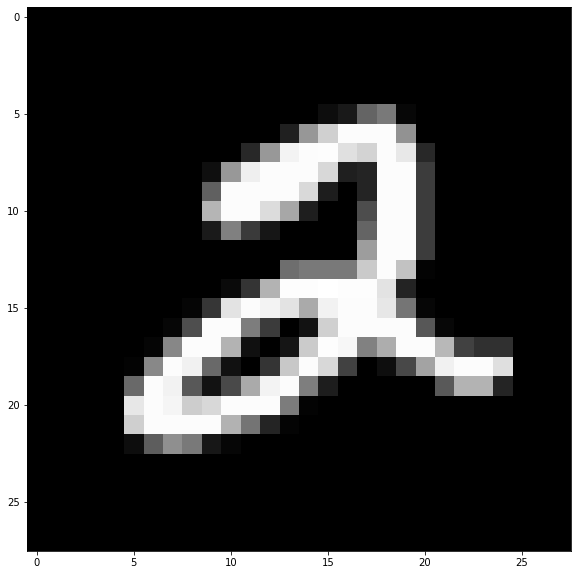

In [7]:
pylab.figure(figsize = ([20,10]))
pylab.imshow(x_train[5],cmap='gray')
print ('Ответ:  {}'.format(y_train[5]))

In [0]:
# метод reshape() меняет форму тензора из (60000, 28, 28)
# в (60000, 784) для того, чтобы каждое изображение описывалось
# 784 признаками - интенсивностями пикселя в градациях серого.
# В тестовой выборке 10000 объектов
x_train = x_train.reshape(60000,(28*28))  #
x_test = x_test.reshape(10000,(28*28))

In [0]:
# нормируем все интенсивности на диапазон от 0 до 1
# Это необязательный шаг, но так будет лучше (наверное)
x_train = np.divide (x_train,255)
x_test = np.divide (x_test,255)

In [0]:
# преобразование вектора ответов в бинарную матрицу для того,
# чтобы каждый нейрон отвечал за свой ответ
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Нейросеть(код Саида)

In [11]:
# сборка модели нейронной сети
# Sequential() это последовательный метод сборки модели
model = Sequential()
# добавляем только один слой нейронов
# всего 10 нейронов с функцией аквтивации softmax
model.add(Dense(392, input_shape = (784,), activation = 'relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3930      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
# компилируем модель, определяя функцию потери loss
# выберая оптимизатор adam (он всегда хорошо работает, или почти всегда)
# в качестве метрики качества accuracy - доля верных ответов
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [0]:
NB_EPOCH = 20
BATCH_SIZE = 128
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [14]:
# запускаем обучение
# epoch - это число прогонов данных через модель
# batch_size размер пакета данных
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE,
                   epochs = NB_EPOCH, verbose = 1,
                   validation_split = VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3180 - acc: 0.9114 - val_loss: 0.1686 - val_acc: 0.9530
Epoch 2/20
48000/48000 [==============================] - 2s 48us/sample - loss: 0.1324 - acc: 0.9622 - val_loss: 0.1260 - val_acc: 0.9654
Epoch 3/20
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0886 - acc: 0.9743 - val_loss: 0.0999 - val_acc: 0.9692
Epoch 4/20
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0652 - acc: 0.9812 - val_loss: 0.0861 - val_acc: 0.9754
Epoch 5/20
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0479 - acc: 0.9864 - val_loss: 0.0824 - val_acc: 0.9743
Epoch 6/20
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0360 - acc: 0.9901 - val_loss: 0.0767 - val_acc: 0.9759
Epoch 7/20
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0277 - acc: 0.9927 - val_loss: 0.

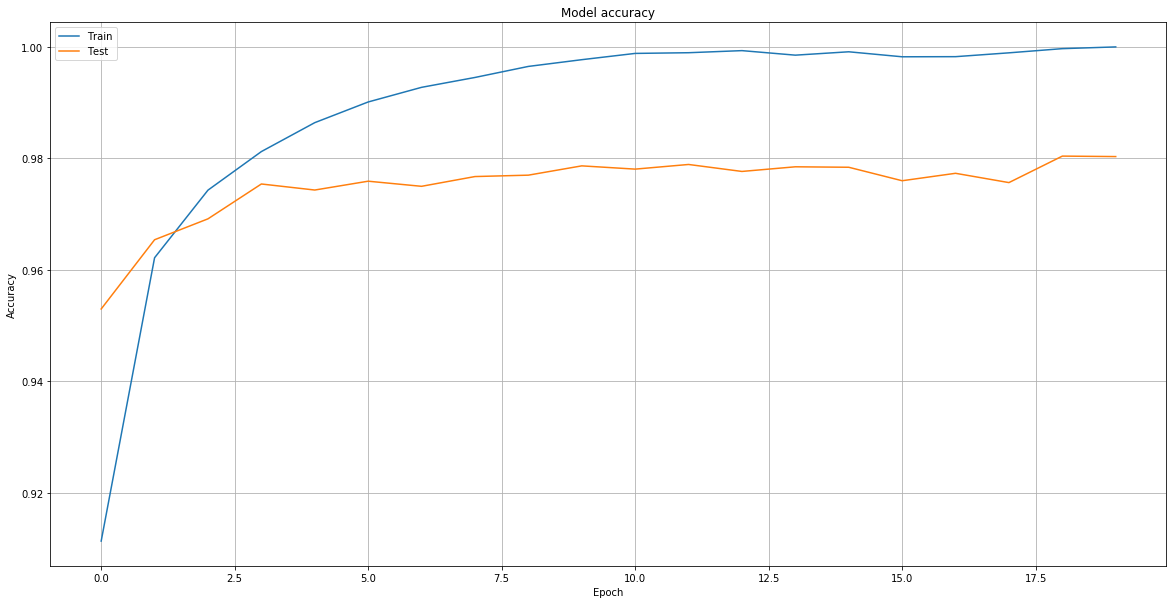

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=[20,10])
plt.grid('on')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Градиентный бустинг


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# x_train = np.load('mnist/x_train.npy')
# y_train = np.load('mnist/y_train.npy')
# x_test = np.load('mnist/x_test.npy')
# y_test = np.load('mnist/y_test.npy')

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data(path='mnist.npz')
x_train = x_train.reshape(60000,(28*28))  #
x_test = x_test.reshape(10000,(28*28))

In [0]:
def _cross_entropy_like_loss(model, input_data, targets, num_estimators):
    loss = np.zeros((num_estimators, 1))
    for index, predict in enumerate(model.staged_predict(input_data)):
        loss[index, :] = -np.sum(np.log([predict[sample_num, class_num-1] for sample_num, class_num in enumerate(targets)])) 
        print(f'ce loss {index}:{loss[index, :]}')
    return loss

In [19]:
print(x_train.shape)
print(y_train.shape)

# print((x_train[:1000]))

(60000, 784)
(60000,)


In [20]:
score_gbc = []
score_gbc2 = []
accuracy_gb = [1, 0.5, 0.3, 0.2, 0.1]
for i in accuracy_gb:
  gbc = GradientBoostingClassifier(learning_rate = i, n_estimators=100)
  gbc.fit(x_train, y_train)
  score_gbc.append(gbc.score(x_test, y_test))
display(score_gbc)

[0.9184, 0.9552, 0.9597, 0.9578, 0.9459]

Text(0, 0.5, 'learning rate')

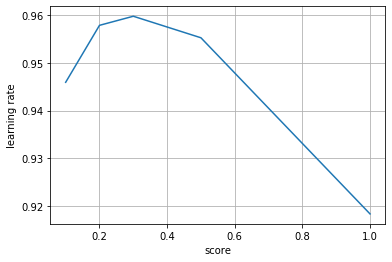

In [25]:
# %matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(accuracy_gb,score_gbc)
ax.grid()
ax.set_xlabel('score')
ax.set_ylabel('learning rate')